# Generate Data

This bundle uses simple synthetic data for training and testing. Using `create_test_image_3d` we'll create images of spheres with labels for each divided into 3 classes distinguished by intensity. The network will be able to train very quickly on this of course but it's for demonstration purposes and your specialised bundle will by modified for your data and its layout. 

Assuming this notebook is being run from the `docs` directory it will create two new directories in the root of the bundle, `train_data` and `test_data`.

First imports:

In [29]:
import os

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from monai.data import create_test_image_3d

plt.rcParams["image.interpolation"] = "none"

As shown here, the images are spheres in a 3D volume with associated labels:

(128, 128, 128) float32 (128, 128, 128) int32


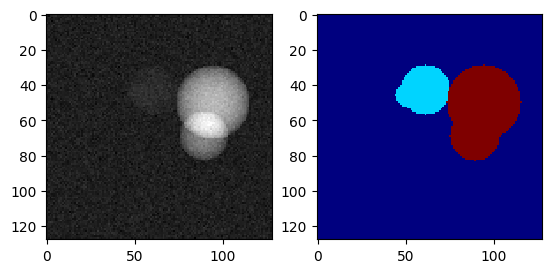

In [47]:
img, lbl = create_test_image_3d(128, 128, 128, 4, num_seg_classes=3, noise_max=0.5)

print(img.shape, img.dtype, lbl.shape, lbl.dtype)

_, (ax0, ax1) = plt.subplots(1, 2)
ax0.imshow(np.average(img, 0), cmap="gray")
ax1.imshow(np.max(lbl, 0), cmap="jet")

50 image/label pairs are now generated into the directory `../data`, assuming this notebook is run from the `docs` directory this will be in the bundle root:

In [52]:
num_images = 50
out_dir = os.path.abspath("../train_data")

os.makedirs(out_dir, exist_ok=True)

for i in range(num_images):
    img, lbl = create_test_image_3d(128, 128, 128, 4, num_seg_classes=3, noise_max=0.5)
    n = nib.Nifti1Image(img, np.eye(4))
    nib.save(n, os.path.join(out_dir, f"img{i:02}.nii.gz"))
    n = nib.Nifti1Image(lbl, np.eye(4))
    nib.save(n, os.path.join(out_dir, f"lbl{i:02}.nii.gz"))

We'll also generate some test data in a separate folder:

In [53]:
num_images = 10
out_dir = os.path.abspath("../test_data")

os.makedirs(out_dir, exist_ok=True)

for i in range(num_images):
    img, lbl = create_test_image_3d(128, 128, 128, 4, num_seg_classes=3, noise_max=0.5)
    n = nib.Nifti1Image(img, np.eye(4))
    nib.save(n, os.path.join(out_dir, f"img{i:02}.nii.gz"))
    n = nib.Nifti1Image(lbl, np.eye(4))
    nib.save(n, os.path.join(out_dir, f"lbl{i:02}.nii.gz"))

In [54]:
!ls {out_dir}

img00.nii.gz  img04.nii.gz  img08.nii.gz  lbl02.nii.gz	lbl06.nii.gz
img01.nii.gz  img05.nii.gz  img09.nii.gz  lbl03.nii.gz	lbl07.nii.gz
img02.nii.gz  img06.nii.gz  lbl00.nii.gz  lbl04.nii.gz	lbl08.nii.gz
img03.nii.gz  img07.nii.gz  lbl01.nii.gz  lbl05.nii.gz	lbl09.nii.gz
